In [1]:
!pip install tensorflow matplot streamlit numpy pandas

In [2]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [3]:
data_train_path="Fruits_Vegetables/train"
data_test_path="Fruits_Vegetables/test"
data_val_path="Fruits_Vegetables/validation"


In [4]:
img_width=224
img_height=224

In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)
data_cat = data_train.class_names
data_train = data_train.map(lambda image, label: (tf.keras.applications.vgg16.preprocess_input(image), label))  # Preprocess for VGG16

Found 3115 files belonging to 36 classes.


In [6]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)
data_val = data_val.map(lambda image, label: (tf.keras.applications.vgg16.preprocess_input(image), label))  # Preprocess for VGG16

Found 351 files belonging to 36 classes.


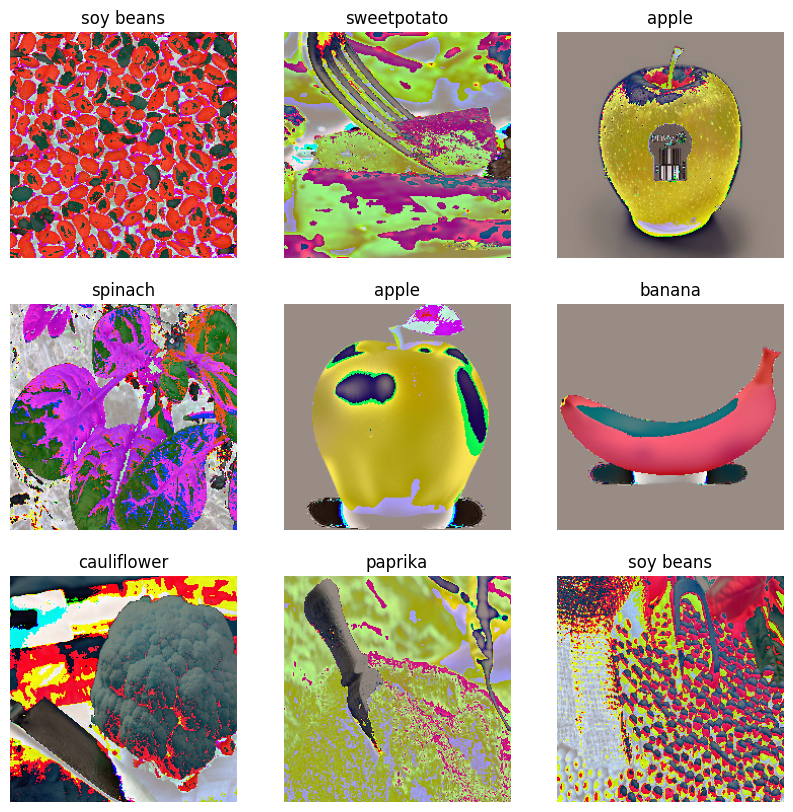

In [7]:
plt.figure(figsize=(10, 10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')
plt.show()

In [8]:
base_model = tf.keras.applications.VGG16(
    weights='imagenet',  # Load pre-trained weights
    include_top=False,   # Exclude the top classifier layers
    input_shape=(img_width, img_height, 3)  # Specify input shape
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


In [9]:
# Freeze the base model layers (optional, can be fine-tuned later)
base_model.trainable = False  # Freeze base model layers

In [10]:
# Add new classification layers on top of the frozen VGG16
model = tf.keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),  # Dense layer with 1024 units and ReLU activation
    layers.Dropout(0.5),                    # Dropout for regularization
    layers.Dense(len(data_cat), activation='softmax')  # Output layer with softmax activation (one neuron per class)
])

In [11]:
# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [12]:
# Train the model
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)


Epoch 1/25


c:\Users\iamsi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\nn.py:599: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


98/98 ━━━━━━━━━━━━━━━━━━━━ 1073s 11s/step - accuracy: 0.3493 - loss: 51.1285 - val_accuracy: 0.8775 - val_loss: 2.1108
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 752s 8s/step - accuracy: 0.7676 - loss: 2.7096 - val_accuracy: 0.9373 - val_loss: 0.7125
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 755s 8s/step - accuracy: 0.8093 - loss: 1.7008 - val_accuracy: 0.9516 - val_loss: 0.5610
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 784s 8s/step - accuracy: 0.8212 - loss: 1.7521 - val_accuracy: 0.9402 - val_loss: 0.5195
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 734s 7s/step - accuracy: 0.8499 - loss: 1.2008 - val_accuracy: 0.9373 - val_loss: 1.1138
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 734s 7s/step - accuracy: 0.8324 - loss: 1.8901 - val_accuracy: 0.9487 - val_loss: 0.5186
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 730s 7s/step - accuracy: 0.8552 - loss: 1.4902 - val_accuracy: 0.9373 - val_loss: 0.7272
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 729s 7s/step - accuracy: 0.8285 - loss: 2.2888 - val_accuracy: 0.9573 - val_loss:

In [1]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.show()

NameError: name 'epochs_size' is not defined

In [ ]:
# Load and preprocess an image for prediction
image = "banana.jpg"
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr = tf.keras.utils.array_to_img(image)  # This line is redundant

# Convert image to a NumPy array and add a batch dimension (required for model prediction)
img_array = tf.keras.preprocessing.image.img_to_array(image)
img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension

# Preprocess the image for VGG16 (same preprocessing as in training)
img_array = tf.keras.applications.vgg16.preprocess_input(img_array)

# Make prediction using the trained model
prediction = model.predict(img_array)

# Process the prediction
score = tf.nn.softmax(prediction[0])  # Assuming prediction is a 2D array, take the first element (prediction for the image)
predicted_class = data_cat[np.argmax(score)]  # Get the class name with the highest probability

print(f'Predicted class for the image: {predicted_class} with a confidence of {np.max(score) * 100:.2f}%')
